## Week 1 Capstone Work

For Week 1, include concepts such as linear regression with polynomial terms, interaction terms, multicollinearity, variance inflation factor and regression, and categorical and continuous features. Complete your Jupyter Notebook homework by 11:59 pm ET on Sunday. 

In [162]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# Reading in the NFL First and Future data: Aggregated Player Tracking Stats for WR's, with artificial sampling to increase the number of injury samples to 500.
wrplaystats = pd.read_csv('data/cleaned/WR_PlayStats_Sampled.csv', header=0)

# Reading in the Team Statistics Aggregated from NFL Team Data 2003-2023 and the NFL_Verse Repository
teamstats = pd.read_csv('data/cleaned/teamstats_inj.csv', header=0)

In [164]:
wrplaystats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length                         10500 non-null  float64
 1   Distance                       10500 non-null  float64
 2   DirChanges                     10500 non-null  float64
 3   Max_S                          10500 non-null  float64
 4   Max_A                          10500 non-null  float64
 5   Injury_Duration                10500 non-null  int64  
 6   Temperature                    10500 non-null  float64
 7   Precipitation                  10500 non-null  float64
 8   FieldType_Natural              10500 non-null  float64
 9   PlayType_Extra Point           10500 non-null  float64
 10  PlayType_Field Goal            10500 non-null  float64
 11  PlayType_Kickoff               10500 non-null  float64
 12  PlayType_Kickoff Not Returned  10500 non-null 

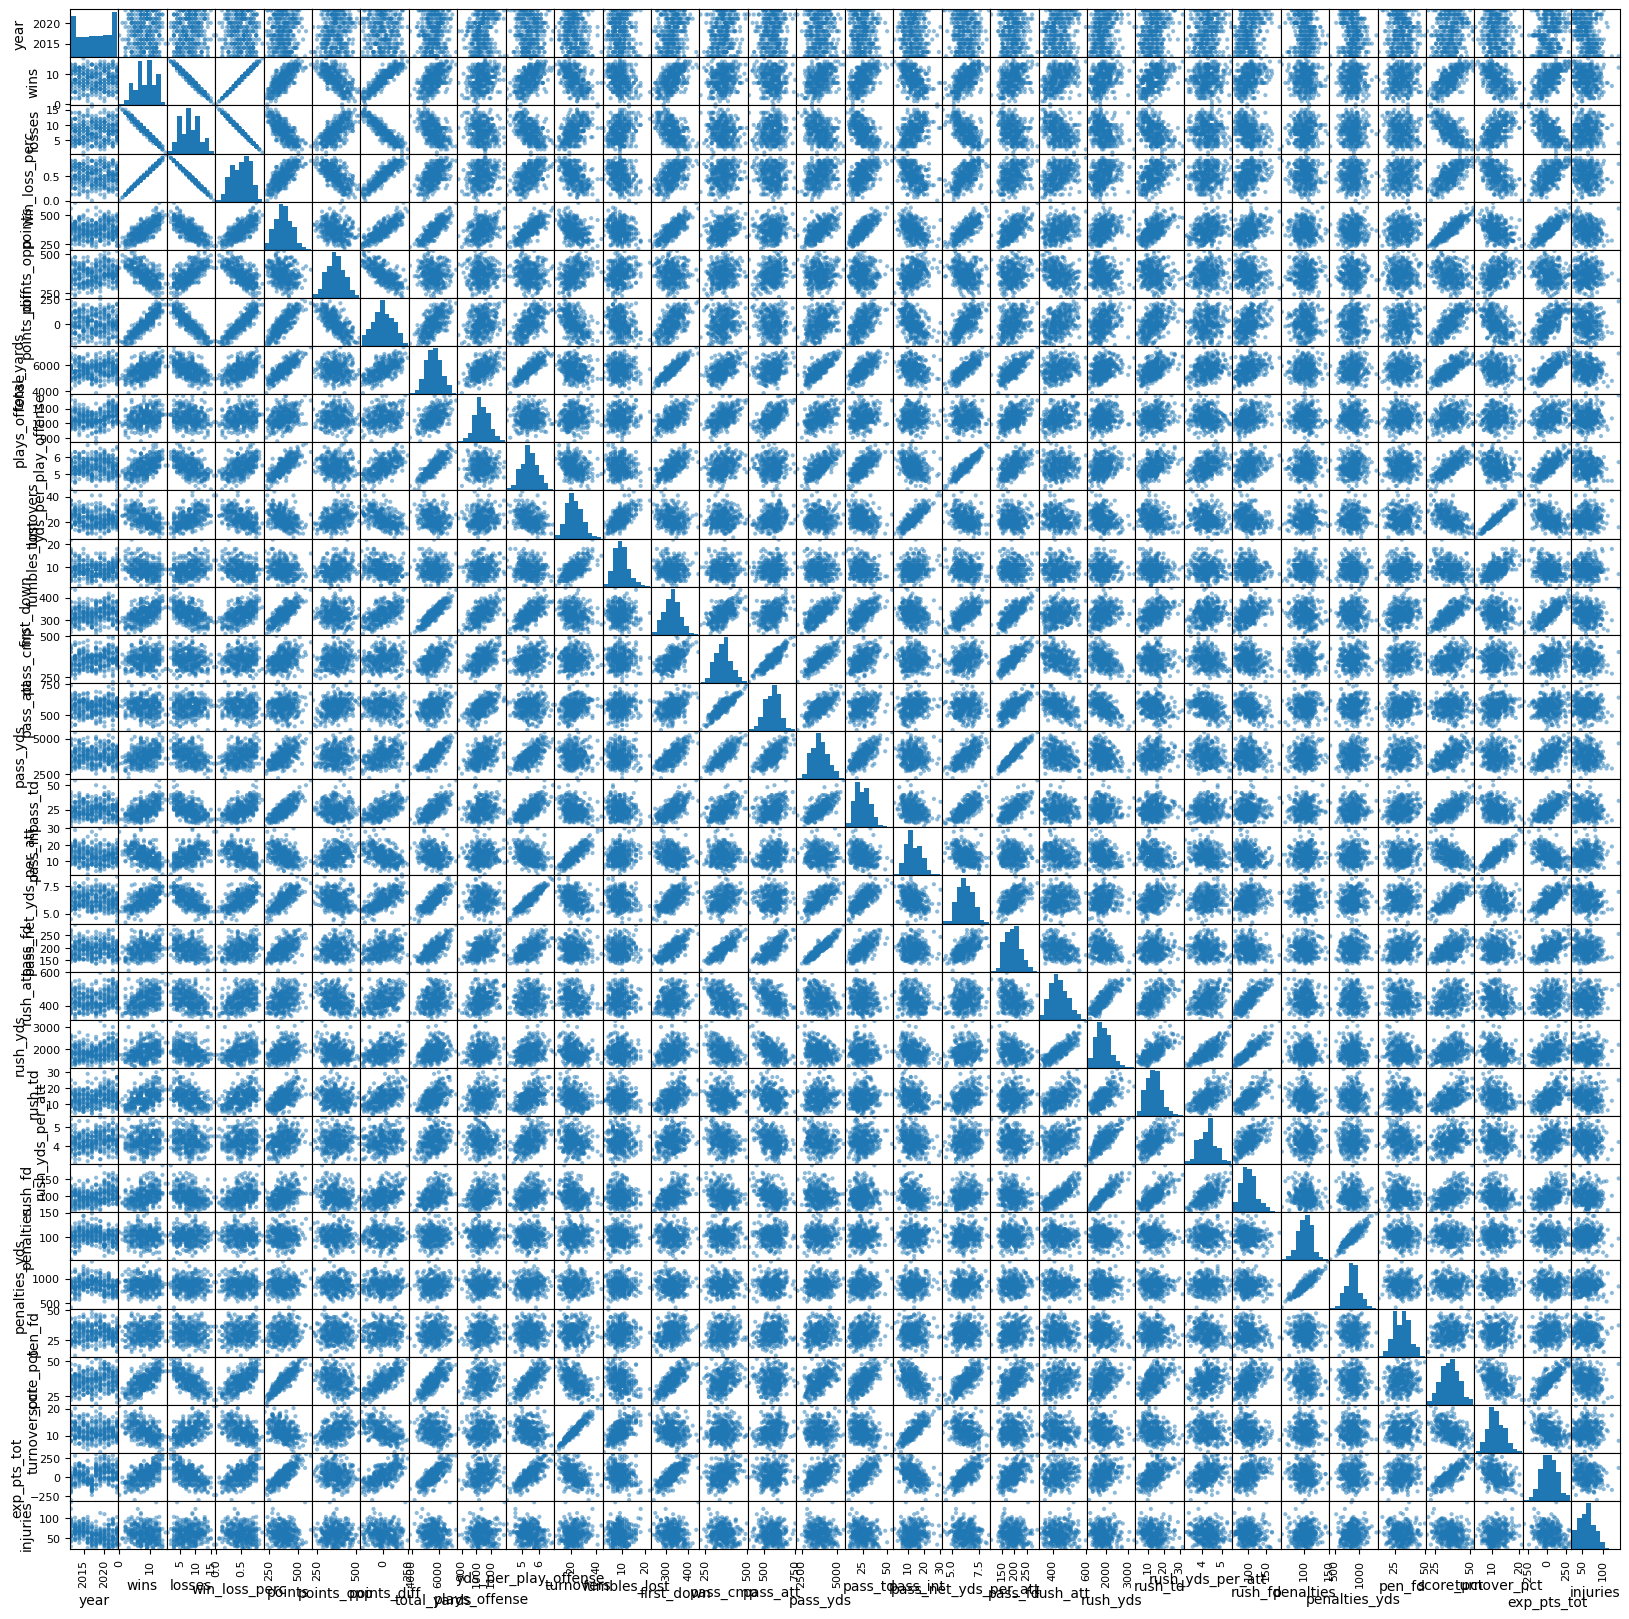

In [165]:
pd.plotting.scatter_matrix(teamstats, figsize=(20,20))
plt.show()

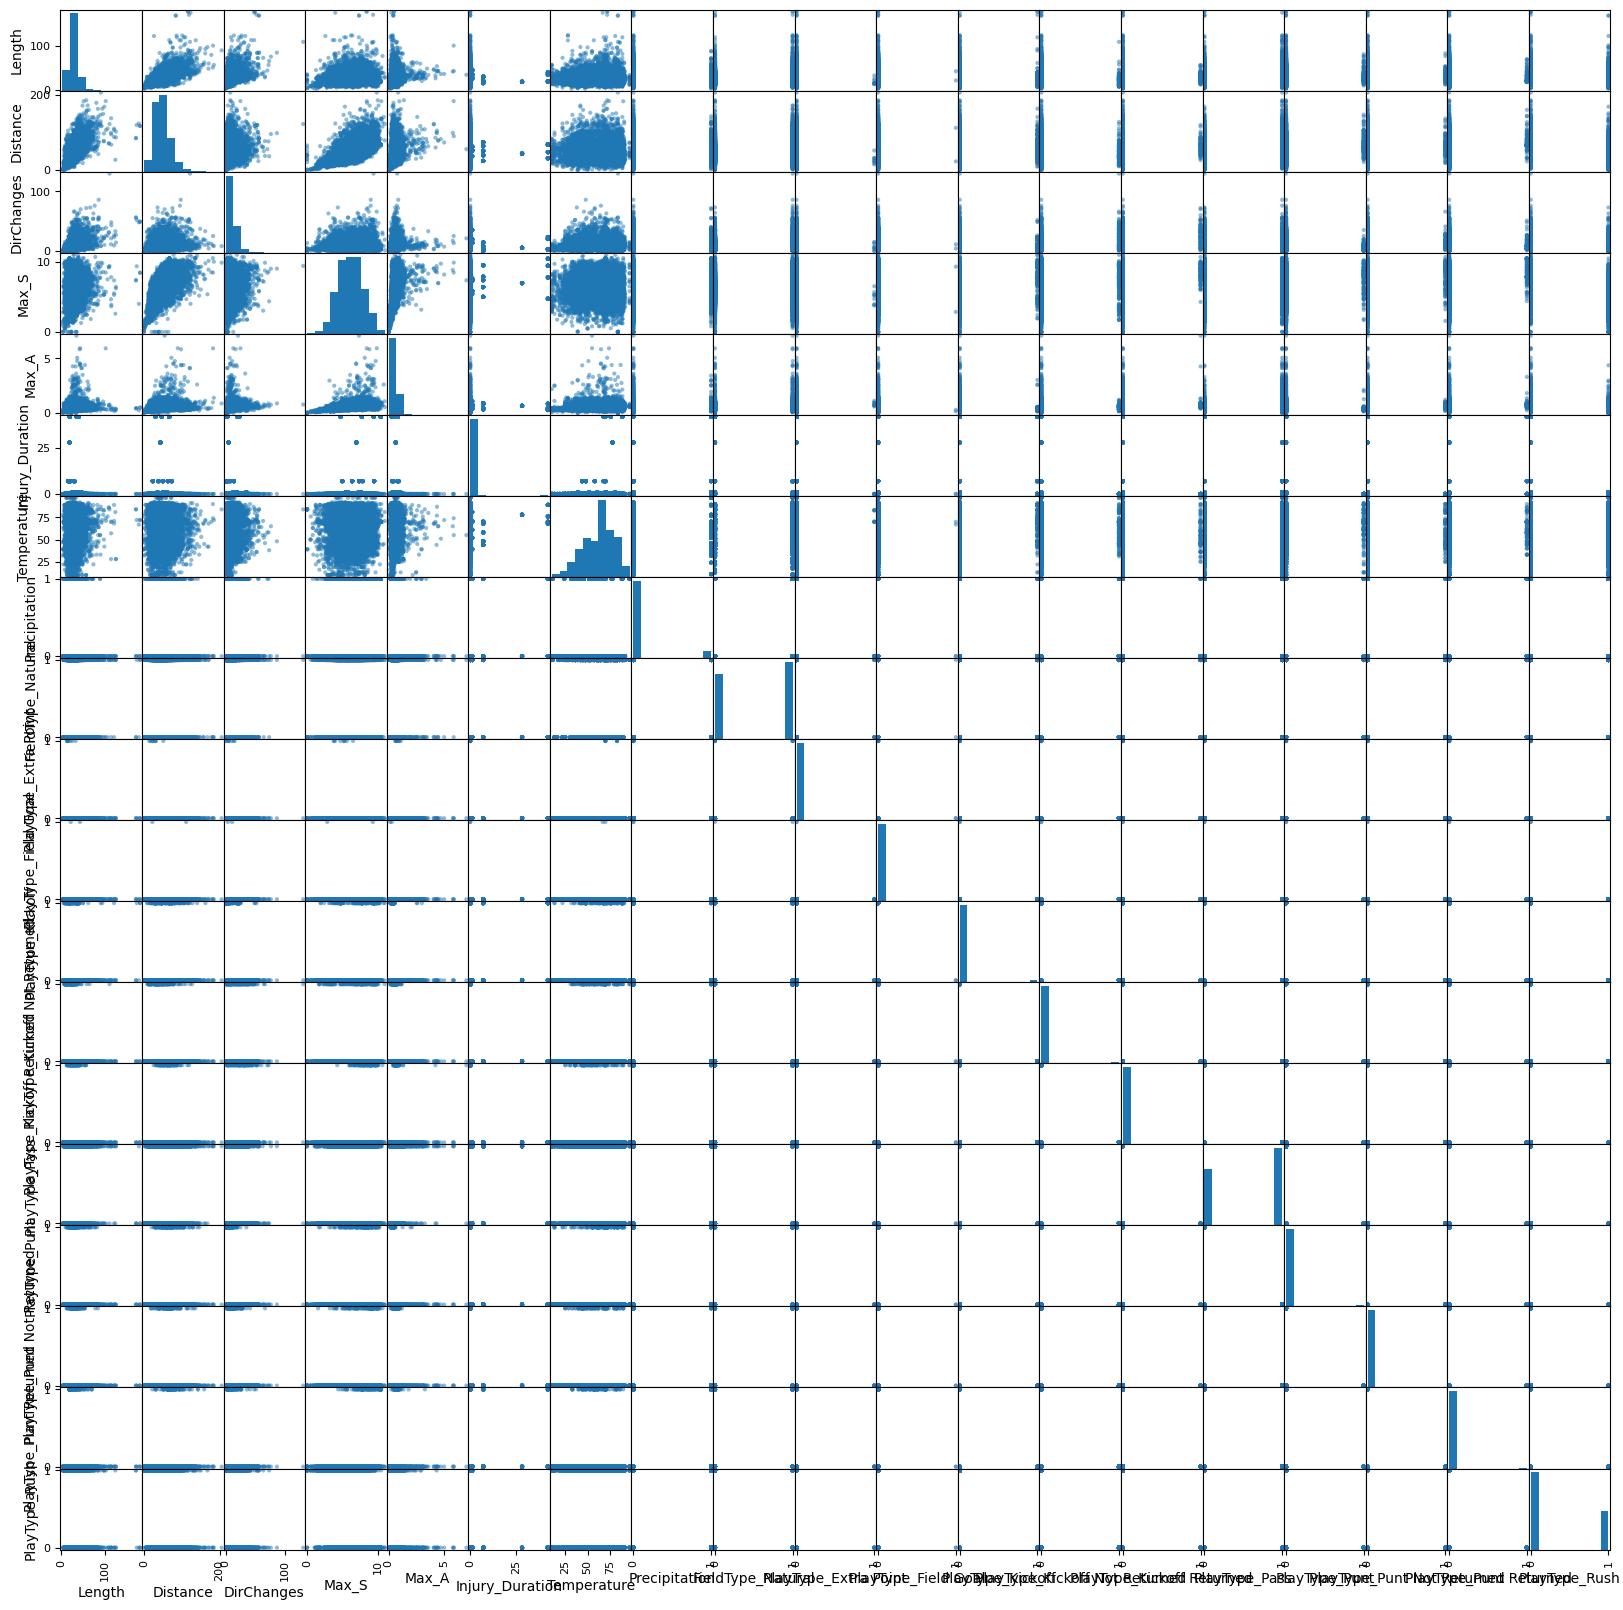

In [166]:
pd.plotting.scatter_matrix(wrplaystats, figsize=(20,20))
plt.show()

In [167]:
teamstats.corr(numeric_only=True)['injuries']

year                   -0.304646
wins                   -0.116265
losses                  0.099528
win_loss_perc          -0.106182
points                 -0.158481
points_opp              0.006078
points_diff            -0.114540
total_yards            -0.136065
plays_offense           0.024461
yds_per_play_offense   -0.174662
turnovers               0.111559
fumbles_lost            0.050589
first_down             -0.127080
pass_cmp               -0.098569
pass_att               -0.012438
pass_yds               -0.106912
pass_td                -0.122658
pass_int                0.111150
pass_net_yds_per_att   -0.141034
pass_fd                -0.078269
rush_att                0.017759
rush_yds               -0.048870
rush_td                -0.127195
rush_yds_per_att       -0.110661
rush_fd                -0.077264
penalties               0.056802
penalties_yds           0.071820
pen_fd                 -0.065051
score_pct              -0.210570
turnover_pct            0.064941
exp_pts_to

In [168]:
wrplaystats.corr(numeric_only=True)['Injury_Duration']

Length                          -0.033054
Distance                         0.007284
DirChanges                       0.000444
Max_S                            0.122677
Max_A                           -0.013324
Injury_Duration                  1.000000
Temperature                      0.094103
Precipitation                    0.074544
FieldType_Natural               -0.127908
PlayType_Extra Point            -0.004237
PlayType_Field Goal             -0.001997
PlayType_Kickoff                 0.476138
PlayType_Kickoff Not Returned   -0.018613
PlayType_Kickoff Returned       -0.013896
PlayType_Pass                   -0.096985
PlayType_Punt                   -0.017058
PlayType_Punt Not Returned      -0.014747
PlayType_Punt Returned           0.257573
PlayType_Rush                   -0.099829
Name: Injury_Duration, dtype: float64

### Running initial Linear Regression

In [169]:
# Team
X_team = teamstats.drop(columns=['injuries', 'year', 'team'])
y_team = teamstats['injuries']

X_team_train, X_team_test, y_team_train, y_team_test = train_test_split(X_team, y_team, test_size=.25, random_state=42)

model_team = LinearRegression()
model_team.fit(X_team_train, y_team_train)
model_team.score(X_team_test, y_team_test)

-0.3059546036812213

In [170]:
# team2 -- using injuries as a feature bc uh predicting based on team stats didn't work
X_team2 = teamstats.drop(columns=['year', 'team', 'wins', 'losses', 'win_loss_perc'])
y_team2 = teamstats['win_loss_perc']

X_team2_train, X_team2_test, y_team2_train, y_team2_test = train_test_split(X_team2, y_team2, test_size=.25, random_state=42)

model_team2 = LinearRegression()
model_team2.fit(X_team2_train, y_team2_train)
print(f"Score: {model_team2.score(X_team2_test, y_team2_test)}\nInjuries Coef: {model_team2.coef_[X_team2.columns.tolist().index('injuries')]}")

Score: 0.7872119263950677
Injuries Coef: -0.0002951758393526338


In [171]:
# wr playstats
X_wr = wrplaystats.drop(columns=['Injury_Duration'])
y_wr = wrplaystats['Injury_Duration']

X_wr_train, X_wr_test, y_wr_train, y_wr_test = train_test_split(X_wr, y_wr, test_size=.25, random_state=42)

model_wr = LinearRegression()
model_wr.fit(X_wr_train, y_wr_train)
model_wr.score(X_wr_test, y_wr_test)

0.33149127758043795

### Analyzing Variance Inflation Factors pt. 1

In [172]:
for i, col in enumerate(X_team2.columns):
    print(f"{col}: {variance_inflation_factor(X_team2, i)}")

points: inf
points_opp: inf
points_diff: inf
total_yards: inf
plays_offense: 22215.43645439539
yds_per_play_offense: 12350.99544610262
turnovers: inf
fumbles_lost: inf
first_down: inf
pass_cmp: 659.2219849383586
pass_att: 5401.729037809863
pass_yds: inf
pass_td: 130.01575541479428
pass_int: inf
pass_net_yds_per_att: 8082.856392302828
pass_fd: inf
rush_att: 11160.612173497988
rush_yds: inf
rush_td: 54.16041421419019
rush_yds_per_att: 4095.68046216867
rush_fd: inf
penalties: 301.69359841652727
penalties_yds: 243.8565697035918
pen_fd: inf
score_pct: 357.1552106774876
turnover_pct: 379.7650247917494
exp_pts_tot: 6.7523298187916
injuries: 13.12526928919332


c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Lots of multicollinearity here, likely because things like points diff, total yards are just calculated from others -- they should be removed

In [173]:
for i, col in enumerate(X_wr.columns):
    print(f"{col}: {variance_inflation_factor(X_wr, i)}")

Length: 2.742130324729515
Distance: 3.606329752393528
DirChanges: 1.6005077211567524
Max_S: 2.762913840219998
Max_A: 1.254087122997886
Temperature: 1.0295631045668825
Precipitation: 1.0544210401574454
FieldType_Natural: 1.0148819610043813
PlayType_Extra Point: 1.0355235365501427
PlayType_Field Goal: 1.0081161883712726
PlayType_Kickoff: 2.300477490420006
PlayType_Kickoff Not Returned: 1.7634204987820277
PlayType_Kickoff Returned: 1.523317887078845
PlayType_Pass: 27.04932584573062
PlayType_Punt: 1.7146784331885867
PlayType_Punt Not Returned: 1.5330318416056612
PlayType_Punt Returned: 1.7250392148403968
PlayType_Rush: 12.860084128793467


Only real multicollinearity here is the playtype_pass and playtype_rush -- which makes sense. Only problem is that I kinda need them both, so I will test what happens if playtype is removed, even though I want it in there.

### Feature Engineering

In [174]:
wrplaystats_eng = wrplaystats.copy()
wrplaystats_eng['Length_sq'] = wrplaystats['Length']*wrplaystats['Length']
wrplaystats_eng['Distance_sq'] = wrplaystats['Distance']*wrplaystats['Distance']
wrplaystats_eng['DirChanges_sq'] = wrplaystats['DirChanges']*wrplaystats['DirChanges']
wrplaystats_eng['Max_S_sq'] = wrplaystats['Max_S']*wrplaystats['Max_S']
wrplaystats_eng['Max_A_sq'] = wrplaystats['Max_A']*wrplaystats['Max_A']
wrplaystats_eng['Temperature_sq'] = wrplaystats['Temperature']*wrplaystats['Temperature']
wrplaystats_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length                         10500 non-null  float64
 1   Distance                       10500 non-null  float64
 2   DirChanges                     10500 non-null  float64
 3   Max_S                          10500 non-null  float64
 4   Max_A                          10500 non-null  float64
 5   Injury_Duration                10500 non-null  int64  
 6   Temperature                    10500 non-null  float64
 7   Precipitation                  10500 non-null  float64
 8   FieldType_Natural              10500 non-null  float64
 9   PlayType_Extra Point           10500 non-null  float64
 10  PlayType_Field Goal            10500 non-null  float64
 11  PlayType_Kickoff               10500 non-null  float64
 12  PlayType_Kickoff Not Returned  10500 non-null 

In [175]:
teamstats_eng = teamstats.copy()
teamstats_eng['fumbles_lost_sq'] = teamstats['fumbles_lost']*teamstats['fumbles_lost']
teamstats_eng['penalties_sq'] = teamstats['penalties']*teamstats['penalties']
teamstats_eng['total_yards_sq'] = teamstats['total_yards']*teamstats['total_yards']
teamstats_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  349 non-null    int64  
 1   team                  349 non-null    object 
 2   wins                  349 non-null    int64  
 3   losses                349 non-null    int64  
 4   win_loss_perc         349 non-null    float64
 5   points                349 non-null    int64  
 6   points_opp            349 non-null    int64  
 7   points_diff           349 non-null    int64  
 8   total_yards           349 non-null    int64  
 9   plays_offense         349 non-null    int64  
 10  yds_per_play_offense  349 non-null    float64
 11  turnovers             349 non-null    int64  
 12  fumbles_lost          349 non-null    int64  
 13  first_down            349 non-null    int64  
 14  pass_cmp              349 non-null    int64  
 15  pass_att              3

### Regression Pt. 2

In [176]:
# Team eng
X_team_eng = teamstats_eng.drop(columns=['injuries', 'year', 'team', 'wins', 'losses', 'total_yards', 'points_diff', 'pass_net_yds_per_att', 'pass_fd', 'plays_offense', 'yds_per_play_offense', 'first_down', 'rush_fd', 'rush_yds_per_att', 'score_pct', 'turnover_pct', 'penalties'])
y_team_eng = teamstats_eng['injuries']

X_team_eng_train, X_team_eng_test, y_team_eng_train, y_team_eng_test = train_test_split(X_team_eng, y_team_eng, test_size=.25, random_state=42)

model_team = LinearRegression()
model_team.fit(X_team_eng_train, y_team_eng_train)
model_team.score(X_team_eng_test, y_team_eng_test)

-0.03005406405437072

Again, this is not effective... but slightly more :)

In [177]:
# team2_eng_eng -- using injuries as a feature bc uh predicting based on team stats didn't work
X_team2_eng = teamstats_eng.drop(columns=['year', 'team', 'wins',  'losses', 'win_loss_perc', 'total_yards', 'total_yards_sq', 'pass_att', 'points_diff', 'pass_net_yds_per_att', 'pen_fd', 'pass_fd', 'pass_cmp', 'plays_offense', 'yds_per_play_offense', 'first_down', 'rush_fd', 'rush_att', 'rush_yds_per_att', 'score_pct', 'turnover_pct', 'penalties', 'penalties_sq', 'fumbles_lost', 'pass_int'])
y_team2_eng = teamstats_eng['win_loss_perc']

X_team2_eng_train, X_team2_eng_test, y_team2_eng_train, y_team2_eng_test = train_test_split(X_team2_eng, y_team2_eng, test_size=.25, random_state=42)

model_team2_eng = LinearRegression()
model_team2_eng.fit(X_team2_eng_train, y_team2_eng_train)
print(f"Score: {model_team2_eng.score(X_team2_eng_test, y_team2_eng_test)}\nInjuries Coef: {model_team2_eng.coef_[X_team2_eng.columns.tolist().index('injuries')]}")

Score: 0.8225927491363894
Injuries Coef: -0.0001156427336478297


The score is improved! But, injuries doesn't have much to do with it.. in fact, even less, and if I remove injuries, it improves the score.

In [178]:
# wr_eng playstats
X_wr_eng = wrplaystats_eng.drop(columns=['Injury_Duration', 'Temperature_sq', 'Distance_sq', 'Max_S', 'Max_A_sq', 'DirChanges_sq', 'Length_sq'])
y_wr_eng = wrplaystats_eng['Injury_Duration']

X_wr_eng_train, X_wr_eng_test, y_wr_eng_train, y_wr_eng_test = train_test_split(X_wr_eng, y_wr_eng, test_size=.25, random_state=42)

model_wr_eng = LinearRegression()
model_wr_eng.fit(X_wr_eng_train, y_wr_eng_train)
model_wr_eng.score(X_wr_eng_test, y_wr_eng_test)

0.33285137989441693

This marginally improved the score.

### Analyzing Variance Inflation Factors pt. 2

points: 333.8366740819645
points_opp: 49.23941300605766
turnovers: 40.0366639962314
pass_yds: 144.9462375361352
pass_td: 93.90349027574716
rush_yds: 64.58482864588434
rush_td: 39.40133882207094
penalties_yds: 44.02103933606384
exp_pts_tot: 4.361683850095375
injuries: 12.182090824113258
fumbles_lost_sq: 5.358210074120947


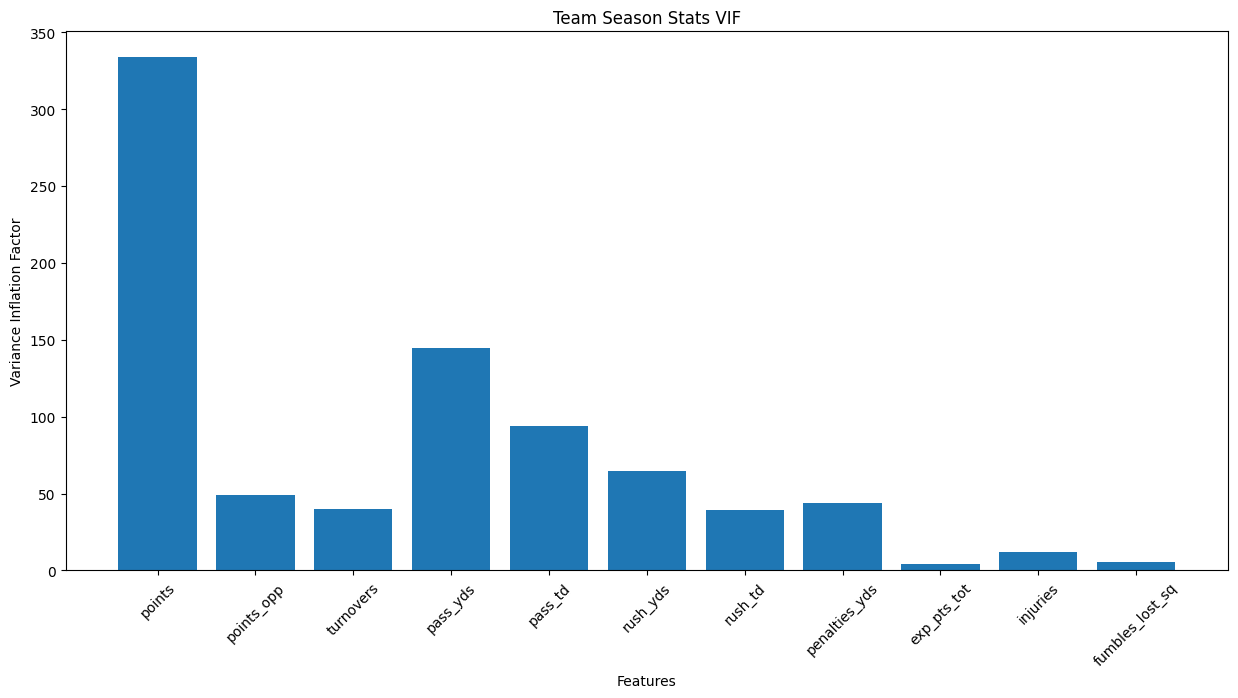

In [179]:
team2_eng_vif = []
for i, col in enumerate(X_team2_eng.columns):
    vif = variance_inflation_factor(X_team2_eng, i)
    team2_eng_vif.append(vif)
    print(f"{col}: {vif}")

plt.figure(figsize=(15,7))
plt.bar(X_team2_eng.columns, team2_eng_vif)
plt.xticks(rotation=45)
plt.title('Team Season Stats VIF')
plt.xlabel('Features')
plt.ylabel('Variance Inflation Factor')
plt.show()

Still lots of collinearity but much less now.

Length: 2.778083949717599
Distance: 3.6848333856928615
DirChanges: 1.5976450972524585
Max_A: 1.2448863016793015
Temperature: 1.0295107775246817
Precipitation: 1.0544154108360508
FieldType_Natural: 1.0156338423992026
PlayType_Extra Point: 1.0258694139780573
PlayType_Field Goal: 1.0060807098973064
PlayType_Kickoff: 1.8316826152217933
PlayType_Kickoff Not Returned: 1.5075270446578313
PlayType_Kickoff Returned: 1.362052713531202
PlayType_Pass: 17.62658908702929
PlayType_Punt: 1.472576324390139
PlayType_Punt Not Returned: 1.350092575968848
PlayType_Punt Returned: 1.51918040247191
PlayType_Rush: 8.961142910119497
Max_S_sq: 2.8261649441631627


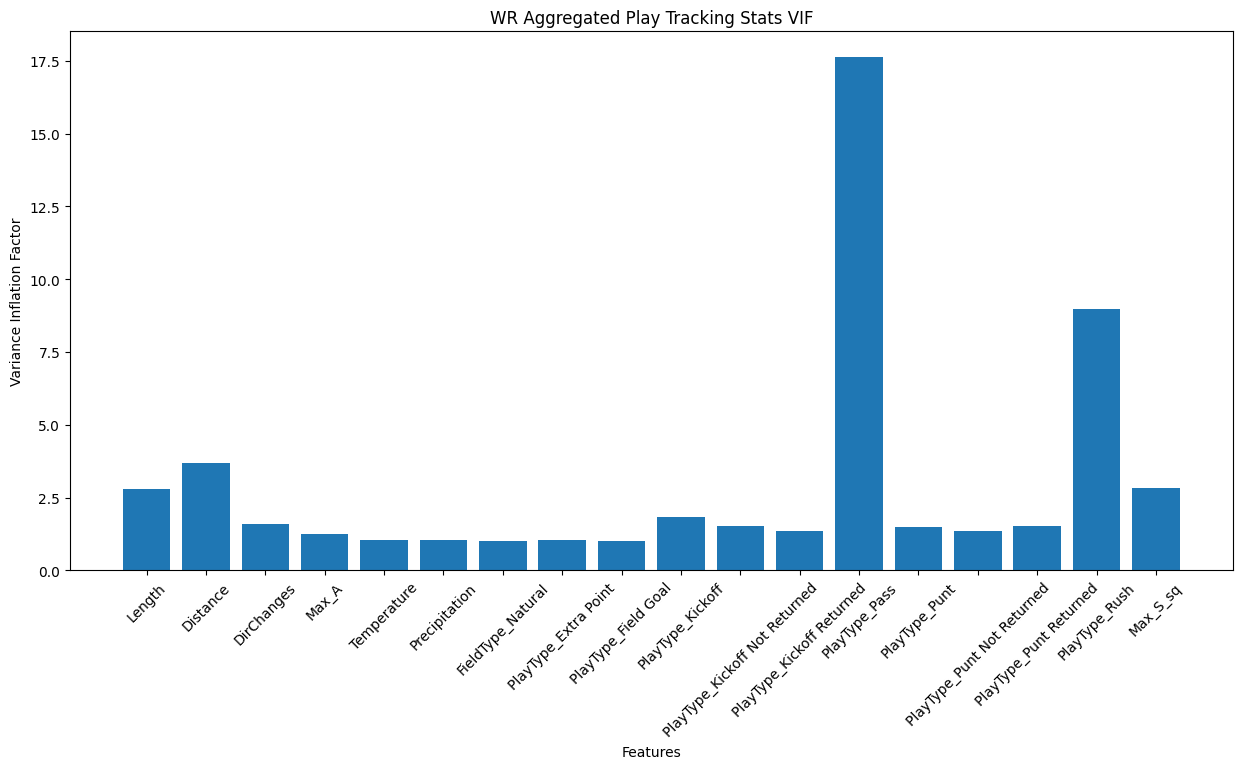

In [180]:
wr_eng_vif = []
for i, col in enumerate(X_wr_eng.columns):
    vif = variance_inflation_factor(X_wr_eng, i)
    wr_eng_vif.append(vif)
    print(f"{col}: {variance_inflation_factor(X_wr_eng, i)}")

plt.figure(figsize=(15, 7))
plt.bar(X_wr_eng.columns, wr_eng_vif)
plt.xticks(rotation=45)
plt.title('WR Aggregated Play Tracking Stats VIF')
plt.xlabel('Features')
plt.ylabel('Variance Inflation Factor')
plt.show()

In [183]:
teamstats_eng.to_csv('data/cleaned/teamstats_eng.csv', sep=',', index=False)

wrplaystats_eng.to_csv('data/cleaned/wr_eng.csv', sep=',', index=False)
